# Prueba Técnica Gases del Caribe

**Autor:** Karina Rodríguez
<br>
**Fecha:** 30/11/2023

In [137]:
import warnings
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## TEORÍA


### 1. SQL

#### A. ¿Cuál es la estructura básica de un SELECT?

La estructura básica de un SELECT corresponde a:

(1) **SELECT** --Campos que se desean seleccionar--

(2) **FROM** --Tabla de la cual se quieren extraer los campos/datos-- 

(3) --Otras cláusulas que permitan realizar operaciones sobre los datos. Ej: **WHERE**, para establecer una condición de filtrado; **ORDER BY**, para ordenar los datos; **GROUP BY** para agrupar los datos--  --Expresión que acompaña a la cláusula--


**Ejemplo:**
A continuación se muestra la tabla Fruta, la cual tiene 3 campos: un id para identificar la fruta, el tipo de fruta y cantidad de frutas por cada tipo.

In [138]:
fruta = pd.DataFrame({"id":[1,2,3,4],
              "Tipo":["Banana", "Fresa", "Piña", "Coco"],
              "Cantidad": [2, 5, 0, 10]})
display(fruta)

,id,Tipo,Cantidad
0,1,Banana,2
1,2,Fresa,5
2,3,Piña,0
3,4,Coco,10


**Query:**
<br>
**SELECT** Tipo (Campo a seleccionar) 
<br>
**FROM** Fruta (Tabla de la cual se extraen los datos)
<br>
**WHERE** (cláusula adicional) Cantidad >= 5 (expresión que acompaña a la cláusula)

En este ejemplo se selecciona el campo Tipo de la tabla Fruta, pero solo aquellas frutas en las que se tiene una cantidad mayor o igual a 5, por lo que el resultado esperado seria: Fresa y Coco.



#### B. ¿Qué es un JOIN?

Es una cláusula que permite realizar una unión entre los registros (filas) de dos tablas, a partir de 1 o más campos que tengan en común las tablas. Se pueden realizar distintos tipos de Join entre las tablas, dependiendo del resultado que se quiera lograr. 

Estructura de un **JOIN**:

**SELECT** Tipo

**FROM** Fruta

**INNER JOIN** Jugos **ON** Fruta.id = Jugos.IdFruta

En este ejemplo las dos tablas que se van a unir son Fruta y Jugos. Los campos que tienen en común estas dos tablas son Id y IdFruta, por lo que la unicón se realizará a partir de este campo. 

Entre los tipo de JOIN que conozco estan:
* **INNER:** con esta unión el resultado es una tabla que contiene los registros que se encuentran en ambas tablas, basado en el campo usado para unirlas. Los registros que se encuentran en una tabla pero no en la otra, no son tenidos en cuenta. 
* **LEFT:** con esta unión el resultados es una tabla con todos los registros de la tabla de la izquierda (en el ejemplo de las frutas la tabla de la izquierda es la que va antes del IINER JOIN), y solo los registros de la tabla derecha que se tienen en común con la tabla izquierda. 
* **RIGTH:** con esta unión el resultados es una tabla con todos los registros de la tabla de la derecha (en el ejemplo de las frutas la tabla de la derecha es la que va despues del INNER JOIN), y solo los registros de la tabla izquierda que se tienen en común con la tabla derecha. 
* **FULL:** con esta unión el resultados es una tabla con todos los registros de las dos tablas, aunque no existan registros en común.

#### C. Diferencias entre INNER JOIN y LEFT JOIN.

La principal diferencia entre estos dos tipos de JOIN es que que el INNER da como resultado una tabla con los registros que se tienen en común entre las dos tablas que se van a unir, mientras que el LEFT JOIN, da como resultado una tabla con todos los registros de la tabla de la izquierda (la que esta al aldo del FROM) y solo los registros de la tabla derecha que se tienen en común con la tabla izquierda. Para los registros que se encuentran en la tabla izquierda, pero no en la derecha, se tendrian valores faltantes en los campos que provienen de la tabla derecha. 

Otra forma de verlo, es que el resultado de un INNER JOIN es la intersección entre dos conjuntos, en este caso cada tabla es un conjunto, y la intersección son los registros que tienen en común las dos tablas, y no se tienen en cuenta todos los registros por fuera de la intersección. En el LEFT JOIN el resultado son todos los registros en la tabla de la izquierda, los registros en la intersección, dejando por fuera todo los registros que solo se encuentran en la tabla de la derecha. 

Se tiene la tabla fruta:

In [139]:
fruta = pd.DataFrame({"id":[1,2,3,4, 5],
              "Tipo":["Banana", "Fresa", "Piña", "Coco", "Corozo"],
              "Cantidad": [2, 5, 0, 10, 10]})
display(fruta)

,id,Tipo,Cantidad
0,1,Banana,2
1,2,Fresa,5
2,3,Piña,0
3,4,Coco,10
4,5,Corozo,10


Y la tabla jugos:

In [140]:
jugos = pd.DataFrame({"id":[1,2,3,4],
              "Jugo":["Granizado de Banana", "Malteada de Fresa", "Agua de Piña", "Agua de Coco"],
              "Costo": [6000, 6500, 5000, 5000],
              "IdFruta": [1, 2, 3, 4]})
display(jugos)

,id,Jugo,Costo,IdFruta
0,1,Granizado de Banana,6000,1
1,2,Malteada de Fresa,6500,2
2,3,Agua de Piña,5000,3
3,4,Agua de Coco,5000,4


**Query**

**SELECT** Tipo, Cantidad, Jugo, Costo

**FROM** Fruta

**INNER JOIN** Jugos **ON** Fruta.id = Jugos.IdFruta

Al hacer un INNER JOIN entre las tablas el resultado esperado seria el siguiente:

In [141]:
display(pd.merge(fruta, jugos,  how="inner", left_on="id", right_on="IdFruta").loc[:,["Tipo", "Cantidad", "Jugo", "Costo"]])

,Tipo,Cantidad,Jugo,Costo
0,Banana,2,Granizado de Banana,6000
1,Fresa,5,Malteada de Fresa,6500
2,Piña,0,Agua de Piña,5000
3,Coco,10,Agua de Coco,5000


En este caso se excluye la información que corresponde a la fruta Corozo, ya que no se tiene información sobre esta en la tabla jugos.

Al hacer un LEFT JOIN entre las tablas el resultado esperado serie el siguiente:

In [142]:
display(pd.merge(fruta, jugos,  how="left", left_on="id", right_on="IdFruta").loc[:,["Tipo", "Cantidad", "Jugo", "Costo"]])

,Tipo,Cantidad,Jugo,Costo
0,Banana,2,Granizado de Banana,6000.0
1,Fresa,5,Malteada de Fresa,6500.0
2,Piña,0,Agua de Piña,5000.0
3,Coco,10,Agua de Coco,5000.0
4,Corozo,10,NaN,NaN


En este caso se traen todos los regsitros de la tabla fruta, y los registros de la tabla jugos con los que se tiene una coincidencia. Para el caso del registro de la fruta Corozo, como no se tiene información en la tabla de jugos correspondiente a esta fruta, se muestran los dos campos que provienen de la tabla jugos con valores faltantes.

### 2. ESTADÍSTICA


#### A. Dar 3 ejemplos de distribuciones estadísticas.

* **Distribución Poisson:**

Esta distribución se da en datos de tipo discreto, y corresponde al número de ocurrencias de un evento en un intervalo de tiempo. Un ejemplo de esta distribución es el número de personas que llegan a una sucursal bancaria cada hora o el número de veces que una persona parpadea cada minuto. 

**Espacio muestral:** números naturales de 0 a infinito.

**Parámetro:** 
Esta distribución solo tiene un parametro: $\lambda$ (lambda). <br>
Lambda corresponde al número de ocurrencias del evento en el intervalo de tiempo establecido,  y toma valores de $\{0,..., \inf\}$.

Para una variable aleatoria discreta $X$ que siga una distribución Poisson, el valor esperado $E(X)=\lambda$, al igual que la varianza $Var(X) = \lambda$.

**Función de probabilidad:**

$P(X=k) = \frac{e^{-\lambda}\lambda^{k}}{k!}$ (siempre y cuando k sea un valor en el espacio muestral de la distribucción, de lo contrario la función de probabilidad toma valor 0)
 
Con la función de probabilidad, se puede saber la probabilidad de que la variable aleatoria discreta $X$ tome un valor $k$. Por ejemplo, cual es la probabilidad de que lleguen 5 personas en una hora a la sucursal bancaria, o la probabilidad de que una persona parpadee 20 veces en un minuto. 



Ejemplo de una distribución Poisson, donde  $\lambda$ toma el valor de 5, y se repite el evento 10000 veces:

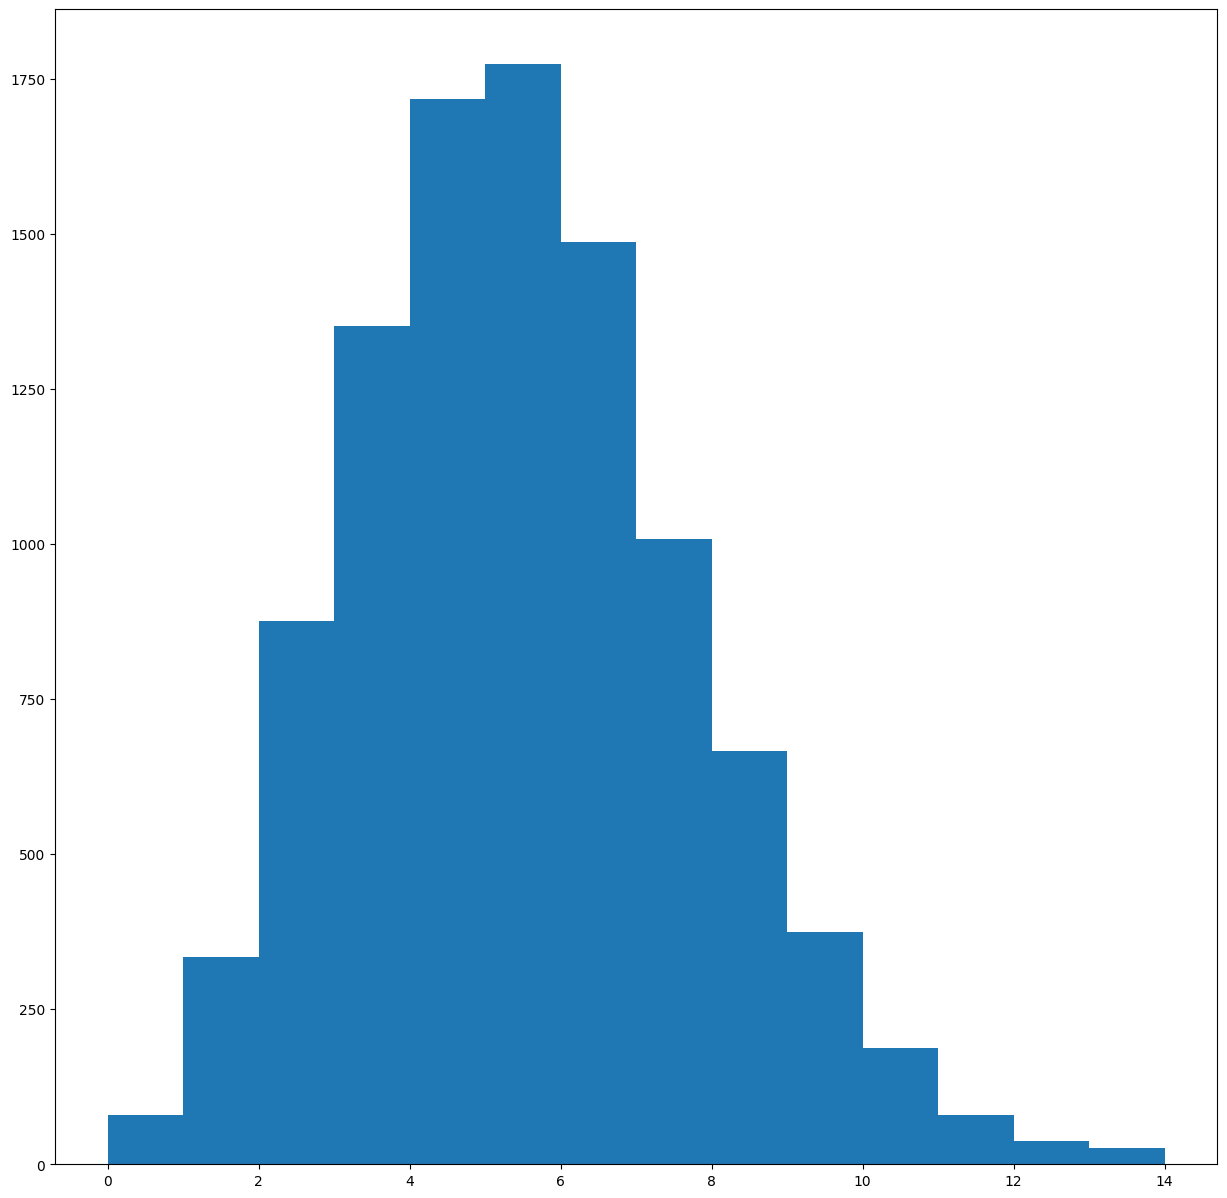

In [143]:
x = np.random.poisson(lam=5, size=10000)
count, bins, ignored = plt.hist(x, 14, density=False)
plt.show()

Se puede ver que es una distribución asimetrica, donde los valores se concentran alrededor de 5, ya que es el valor que se espera tome la distribución al repetirse muchas veces el experimento.

* **Distribucción Bernoulli**

Esta distribución tambien se da en datos de tipo discreto, y se da cuando se tiene un evento con solo 2 posibles resultados, generalmente denominados como exito o fracaso, y hay una probabilidad de ocurrencia asociada con el exito. Un ejemplo de esta distribución es el tipico lanzamineto de monedas en donde se tiene solo dos opciones, cara o sello, y una probabilidad de 0.5 de de que salga cara o sello (a menos que la moneda esté trucada). Otro ejemplo seria los resultados de una prueba diagnostica para alguna enfermedad con una alta tasa de contagio, y se desea saber si se tiene o no la enfermedad, para lo cual hay una probabilidad del 0.6 de contraer la enfermedad. 

**Espacio muestral:** {0,1} (el exito se considera como 1, y el fracaso 0)

**Parámetro:** 
Esta distribución solo tiene un parametro: $p$ . <br>
$p$ corresponde a la probabilidad de tener exito, y toma valores de $0 <= p <= 1$.

Para una variable aleatoria discreta $X$ que siga una distribución Bernoulli, el valor esperado $E(X)=p$, al igual que la varianza $Var(X) = p(1-p)$.

**Función de probabilidad:**

$P(X=k) = p^{k}(1-p)^{1-k}$ (siempre y cuando k sea un valor en el espacio muestral de la distrbiucción, de lo contrario la función de probabilidad toma valor 0)
 
Con la función de probabilidad, se puede saber la probabilidad de que la variable aleatoria discreta $X$ tome un valor $k$, es decir, que sea 0 o 1. En el ejemplo de las monedas, podriamos considerar un exito que se tenga cara como resultado, y un fracaso que salga 0, cuando la probabilidad de sacar cara es 0.5.

Ejemplo de una distribución Bernoulli, donde  $p$ toma el valor de 0.1, y se repite el evento 10000 veces:

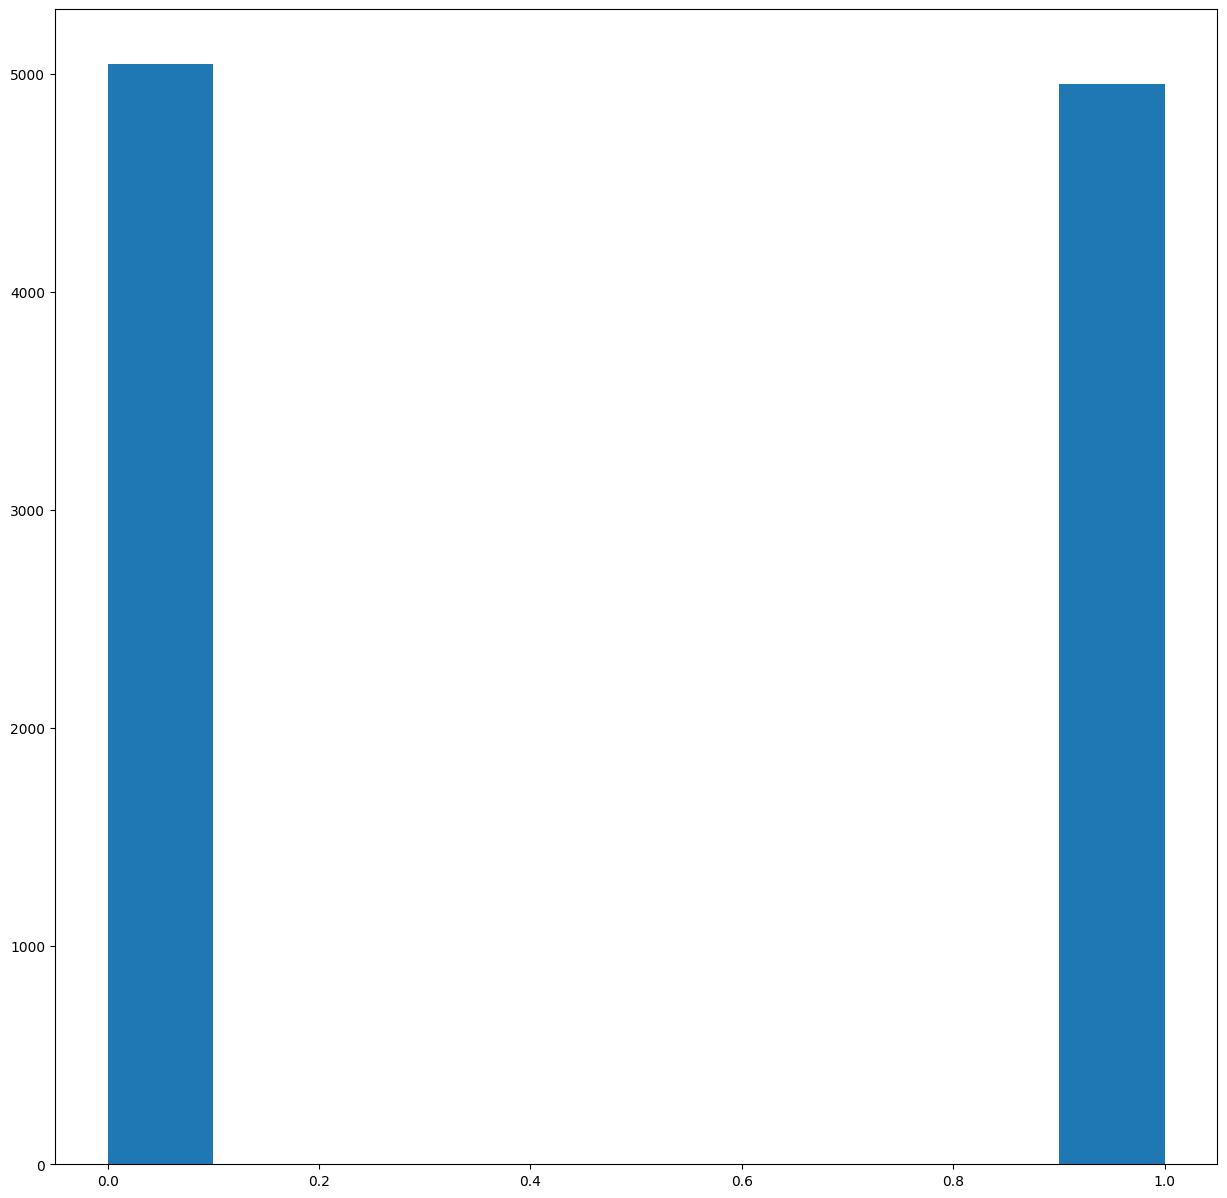

In [144]:
x = np.random.binomial(n=1, size=10000, p=0.5)
count, bins, ignored = plt.hist(x, 10, density=False)
plt.show()

A partir de la distribución de Bernoulli, surgen otras distribuciones, como la Distribución Binomial, la cual permite modelar la ocurrencia de $k$ exitos cuando se repite $n$ veces un experimento (o cuando ocurre muchas veces un evento), y los resultados de los eventos no se ven influenciados por lo resultados de eventos anteriores. Esta distribución tambien es de discreta, con un espacio muestral de {0, ..., $\inf$}

* **Distribucción Normal**

Esta distribución se da en datos de tipo continuo, y la base de muchos de los metodos estadisticos. Es un ejemplo de esta distribución, seria las mediciones de estatura de un grupo de pacientes que van a revisión de medico general, las calificaciones de un grupo de estudiantes o mediciones de la longitud de barras de hierro producidas por maquinas.

**Espacio muestral:** Todos los reales $\R$.

**Parámetro:** 
Esta distribución solo tiene dos parametros: $\mu$ y $\sigma^{2}$. <br>
$\mu$ se considera la media o el valor al que tienden la variable aleatoria con distribución normal, y toma valores de todos los reales $\R$. Por otro lado, $\sigma^{2}$ es la varianza de los datos, con $\sigma^{2} > 0$.

Para una variable aleatoria discreta $X$ que siga una distribución Normal, el valor esperado $E(X)=\mu$, al igual que la varianza $Var(X) = \sigma^{2}$. Como existen diferentes variaciones de la distribución normal, la esperanza y varianza no son iguales. Tomando de ejemplo la Distribución normal estandar, la cual es la mas utilizada en estadistica, tenemos que para esta distribución $\mu$ = 0 y $\sigma^{2}$ = 1. 

**Función de densidad:**

$f(x)= \frac{1}{\sqrt{2\pi\sigma^{2}}}e^{\frac{(x-\mu)^{2}}{2\sigma^{2}}}$
 
A diferencia de las distribuciones discretas, con la función de densidad no es posible saber la probabilidad de que $X$ tome un valor exacto, ya que este valor siempre será 0. Para las dsitrbuciones continuas, se hace uso de la Función de distribución acumulada, para determinar la probabilidad de que $X$ se menor o mayor a un valor, o que se encuentre en un intervalo especifico.

**Función de distribución acumulada:**

$F(t) = P(X <= t) =  \int_{-\infty}^{t} \frac{1}{\sqrt{2\pi\sigma^{2}}}e^{\frac{(x-\mu)^{2}}{2\sigma^{2}}}dx$

Con esto se podrian dar respuesta a preguntas como ¿Cual es la probabilidad de que la estatura de los pacientes sea mayor a 160.5 cm, o ¿Cual es la probabilidad de que los estudiantes pierdan el examen con una nota menor a 3?.


Ejemplo de una distribución Normal, donde  $\mu$ = 0, $\sigma^{2}$ = 1, y se repite el evento 10000 veces:

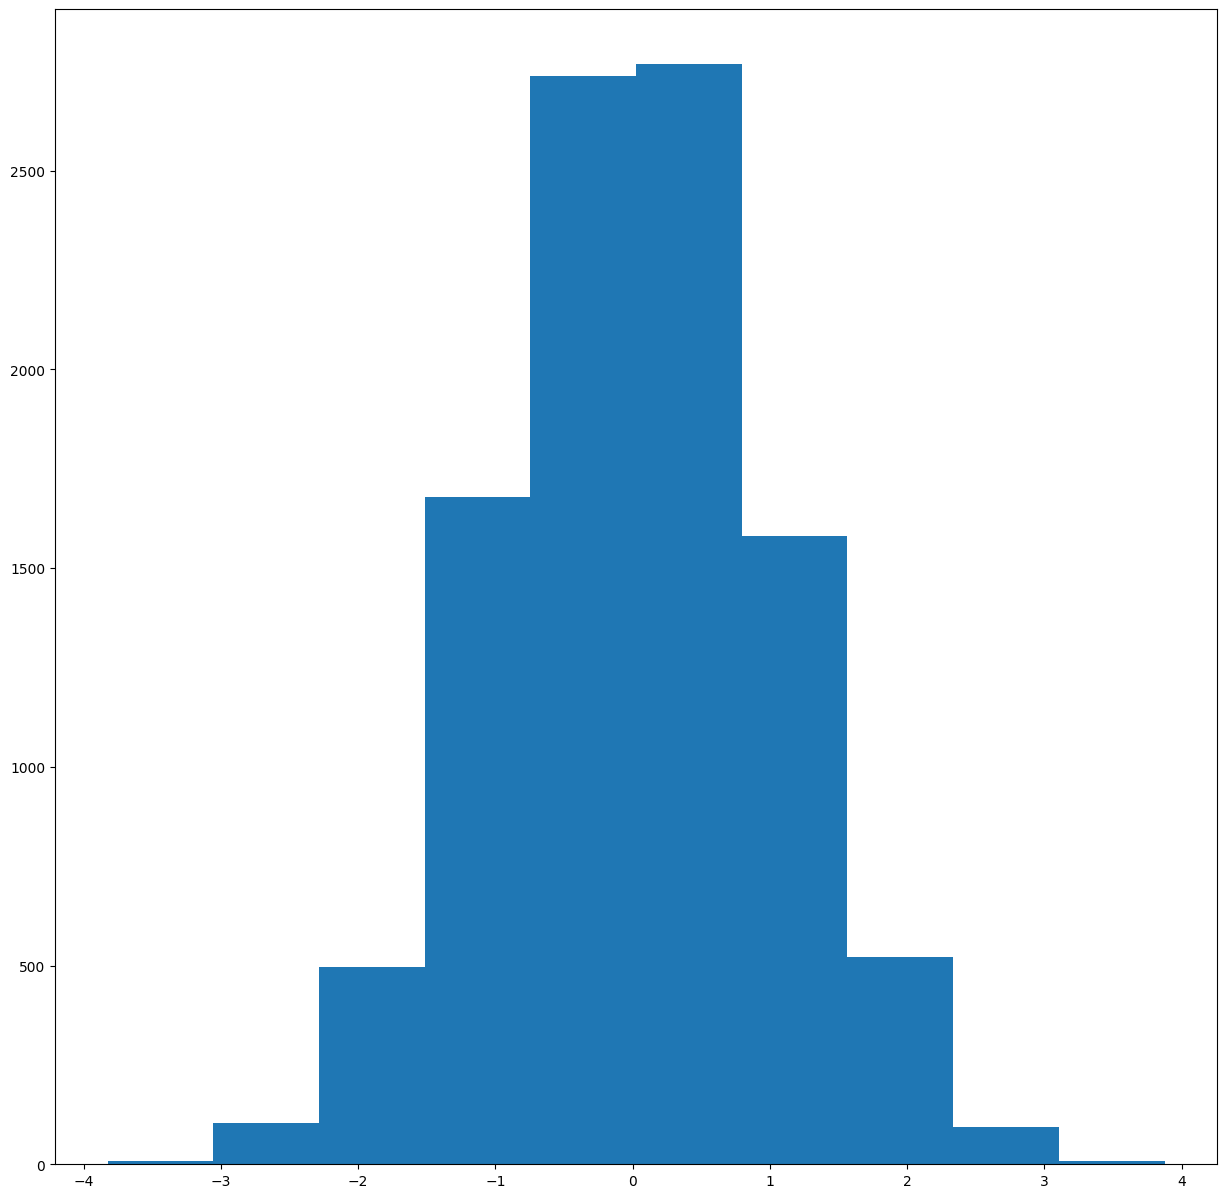

In [145]:
x = np.random.normal(loc=0, scale=1, size=10000)
count, bins, ignored = plt.hist(x, 10, density=False)
plt.show()

#### B.  Defina media, mediana y moda.

* Media
<br>
La media es una medida de tendencia central, que sirve para identificar hacia que valor se inclina una distribución de datos númericos. Se calcula realizando la suma de todos los valores númericos, y dividiento esa suma por la cantidad de datos. Es una de las medidas de tendecia central mas utilizada, pero se ve influenciada por valores extremos que se puedan tener en la distribución de datos. Por esto ultimo han surgido otras derivaciones de la media, como la media truncada, que buscan dismunir o eliminar la influencia de los datos extrmeos o atipicos sobre el valor de la media.

Ejemplo:

Se tiene de ejemplo el siguiente vector de números, el cual tiene la dsitribución mostrada en el historgrama

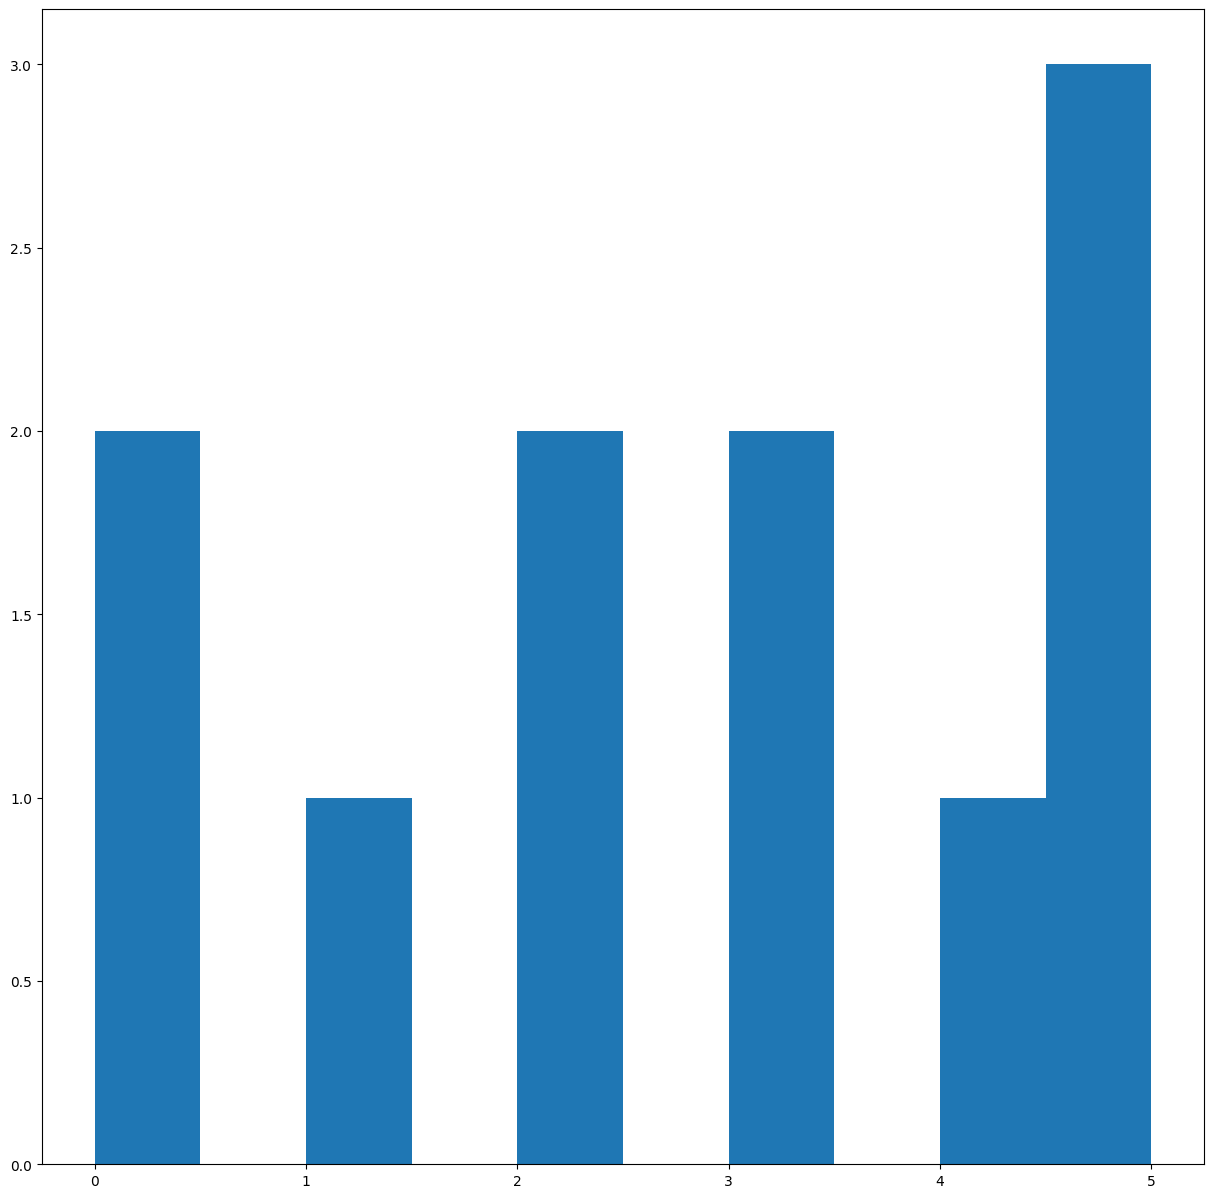

In [146]:
v = [1, 2, 2, 4, 3, 3, 0, 0, 5, 5, 5]
count, bins, ignored = plt.hist(v, 10, density=False)
plt.show()


La media para estos datos seria:

In [147]:
media = np.sum(v)/len(v)
print("Media:",media)

Media: 2.727272727272727


* Mediana
<br>
La mediana es otra medida de tendencia central, que permite dividir lo datos en dos partes, siendo el punto central de la distribución de datos. 
Para obtener la mediana, primero se hace un ordenamiento de los datos, de manera ascendente, y se selecciona el valor que se encuentra en el punto central, teniendo igual cantidad de datos por debajo y por encima de ese valor. Cuando la cantidad de datos es impar, la mediana se encuentra facilmente de esa forma, pero cuando los datos son pares, se escogen los dos valores en la mitad de los datos, manteniendo la misma cantidad de datos por debajo y por encima de esos dos valores. La media de de los dos valores centrales seria la mediana. La mediana tiene la ventaja sobre la media, de que no es sensible a los valores extremos o atipicos, por lo que a veces se prefiere utilizarla por sobre la media, para describir un conjunto de datos.
<br>

Para el ejemplo anterior, la mediana es:


In [148]:
v.sort()
print(v)
mediana = np.median(v)
print("Mediana:",mediana)

[0, 0, 1, 2, 2, 3, 3, 4, 5, 5, 5]
Mediana: 3.0


En este caso se tiene un número de datos impar, y al ordenar los datos, el punto central es 3.

* Moda
<br>
La moda tambien es una medida de tendencia centrar, que permite saber cual es el valor mas frecuente en un conjunto de datos númericos (generalmente discretos) o cual es la categoria mas frecuente para datos de tipo categoricos. Se calcula simplemente realizando un conteo de los datos, y eligiendo el valor con mayor frecuencia.


In [149]:
df = pd.DataFrame({"vector":v})
print(df["vector"].value_counts())
print("Moda:", 5)

vector
5    3
0    2
2    2
3    2
1    1
4    1
Name: count, dtype: int64
Moda: 5


En este caso el valor con mayor frecuencia es 5, que se puede encontrar 3 veces en el conjunto de datos, por lo que la moda es 5.

#### C.  ¿Cómo identificar datos atípicos?

Para identificar datos atipicos se pueden tener tres enfoques:
* Datos atipicos considerando los datos univariantes: solo interesan los datos atipicos para una sola variable.
* Datos atipicos considerando los datos bivariantes: interesan los datos atipicos para la relación de dos variables
* Datos atipicos considerando los datos multivariantes: interesan los datos atipicos para la relación de un conjunto de datos con mas de 2 variables.

En el caso de querer identificar los casos atipicos univariantes, se pueden utilzar los siguientes metodos:
* **Utilizar el criterio del rango intercuartílico (IQR):**
El IQR se calcula teniendo en cuenta los cuartiles de un conjunto de datos, Q1 y Q3, los cuales representan los puntos que separan los datos en un 25% y 75% respectivamente. Restando el Q3 con el Q1 se obtiene el IQR.

A partir del IQR se plantean dos limites:

$$LI = Q1 -1.5IQR $$
$$LS = Q3 +1.5IQR $$

Todos los datos que se encuentre por debajo de LI o port encima de LS se consideran valores atipicos. Similar se podria realizar teniendo en cuenta los percentiles, considerando el percentil 2.5 y el 97.5 para calcular el IQR.
Tambien se podria utilizar un bloxplot, para identificar visualmente los puntos que son considerados atipicos.

In [150]:
df = pd.DataFrame({"vector":[-10,0,0,1,3,5,2,7,100, 123]})
x = np.quantile(df["vector"],  [0.25,0.5,0.75])
Q1 = x[0]
Q3 = x[2]
IQR = Q3 - Q1 
LI = Q1 - 1.5*IQR
LS = Q3 + 1.5*IQR
df.loc[(df["vector"] < LI) | (df["vector"] > LS)]

,vector
0,-10
8,100
9,123


Se logra apreciar que para este conjunto de datos hay 3 atipicos, 1 para el limite inferior y 2 para el limite superior.

* **Filtro de Hampel:** Tambien se puede usar el filtro de Hampel, que considera un itervalo conformado por la mediana ($\tilde{X}$), y la mediana de las desviaciones absolutas, $MAD = mediana(|X_{i}- \tilde{X}|)$.

    En este caso los limites del intervalo son los siguientes:
    
    $$LI = \tilde{X} - 3\cdot MAD$$
    $$LS = \tilde{X} + 3\cdot MAD$$

In [151]:
median_v = np.median(df["vector"])
mad = np.median([abs(number-median_v) for number in df["vector"]])
LI = median_v - 3*mad
LS = median_v + 3*mad
df.loc[(df["vector"] < LI) | (df["vector"] > LS)]

,vector
0,-10
8,100
9,123


Con este metodo se obtienen los mismo datos atipicos obtenidos con el metodo del rango intercuartílico.

* **Pruebas estadisticas:** Tambien se pueden utilizar diferentes pruebas estadicticas que ayudan a determinar si un dato es atipico, como la Prueba de Grubbs, la Prueba de Dixon (estas solo permiten evaluar un dato unico al tiempo) y la Prueba de Rosner (esta si permite evaluar todos los datos para detefctar varios atipicos al tiempo.)

Para detectar datos atipicos para datos bivariantes se pueden utilizar las siguientes tecnicas:
* **Prueba de Bonferroni:** Esta prueba se utiliza para detectar si un punto resultantes de la relación de dos variables es atipico. Esta prueba tiene las siguientes hipotesis:

$H_{0}:$ la observación i-ésima NO es un atipico

$H_{1}:$ la observación i-ésima SI es un atipico

(esta prueba se puede realizar principalmente desde el lenguaje R)

* **Diagrama de dispersión:** el diagrama tambien puede ayudar a identificar los valores atipicos visualmente, pero no es metodo muy exacto.




Para detectar datos atipicos para datos multivariantes se puede usar el siguiente metodo:
* **Distancia de Mahalanobis**: este metodo es util cuando se estan realizando analisis multivariantes, y permite detectar atipicos multivariante para todo el conjunto de datos, ya que mide la distancia de de un punto (un registro) al centroide de las observaciones. En palabras simples, lo que se hace con este metodo es calcular el cuadrado de la distancia de Mahalanobis ($D^{2}$) para cada registro del conjunto de datos (registros=filas), este cuadrado se asume tiene una distribución $\chi ^{2}$ con grados de libertad, por lo que se aplica una prueba estadistica $\chi ^{2}$ que evalue cada distancia para determinar si es atipico o no, considerando un nivel de significancia ya sea de 0.001, 0.05 o 0.1. 
Las hipotesis de la prueba serían:

$H_{0}:$ El punto NO es atipico
$H_{1}:$ El punto SI es atipico

Para cada registro se obtendria un p-valor, que en caso de ser menor al nivel de significancia escogido, indica que el resgistro si se podria considerar atipico estadisticamente ( rechazo $H_{0}$)

Además de utilizar todos estos metodos, tambien es importante tener conocimiento sobre el contexto de los datos, para determinar si los datos realmente se consideran atipicos, ya que en muchos caso, lo datos si pueden ser extremos al resto del conjunto de datos, pero pueden estar justificados por el mismo comportamiento de los datos.

#### D.  ¿De qué forma trataría con datos faltantes?

Con los datos faltantes se podrían realizar dos operaciones: eliminarlos o imputarlos. Para determinar que se podria hacer con los datos faltantes seguiria los siguientes pasos:

1. Identificar el origen de los datos faltantes, es decir, que tipo de datos faltantes son. Estos pueden ser principalmente de 3 tipos: Faltantes no al azar, Faltantes al azar, Faltantes completamente al azar. Dependiendo de que tipo de datos faltantes se tenga, se podrian eliminar o realizar una imputación sobre los datos. Ya que no todos se podrian eliminar tan facilmente, por perdida de información que pueda afectar el análisis, o realizar una imputación, que puedo que no haga sentido en los datos.

2. Si se tienen faltantes del tipo no al azar, se podrian eliminar los registros atipicos
Eliminarlos no seria la mejor opción, pero en caso de hacerlo, verificaria si la cantidad de datos faltantes es menor al 5% de los datos de la variable, y en caso de serlo, se podrian eliminar los registros. Si la cantidad de fatos faltantes es superior, lo mejor es tratar de realizar una imputación de datos.

3. La imputación consistiria en rellenar el espacio del dato faltante con otro valor.
Por lo general para datos númericos, se imputa el dato faltante con la media, la mediana o la moda, principalmente se elige la mediana para evitar afectar la distribucción de los datos. Tambien se puede aplicar otras tecnicas de imputaciones un poco mas elaboradas, como es la imputación iterativa, la cual busca realizar un proceso parecido a una predicción para rellenar el dato falante con un valor mas cercano a la realidad, ya que considera no solo los valores del campo de interes, sino tambien los datos de las otras columnas para encontrar el valor mas ajustado.

Para datos categoricos, lo común es utilizar la moda para reemplazar a los datos faltantes.



Ejemplos de imputación:

In [152]:
df = pd.DataFrame({"Estatura": [150, 176,156, None, 180, 150, 160, 165, 150, None],
                   "Peso": [45, 68, 50, 70, 80, 47, 68, 64, 60, 72]})
print(df)

   Estatura  Peso
0     150.0    45
1     176.0    68
2     156.0    50
3       NaN    70
4     180.0    80
5     150.0    47
6     160.0    68
7     165.0    64
8     150.0    60
9       NaN    72


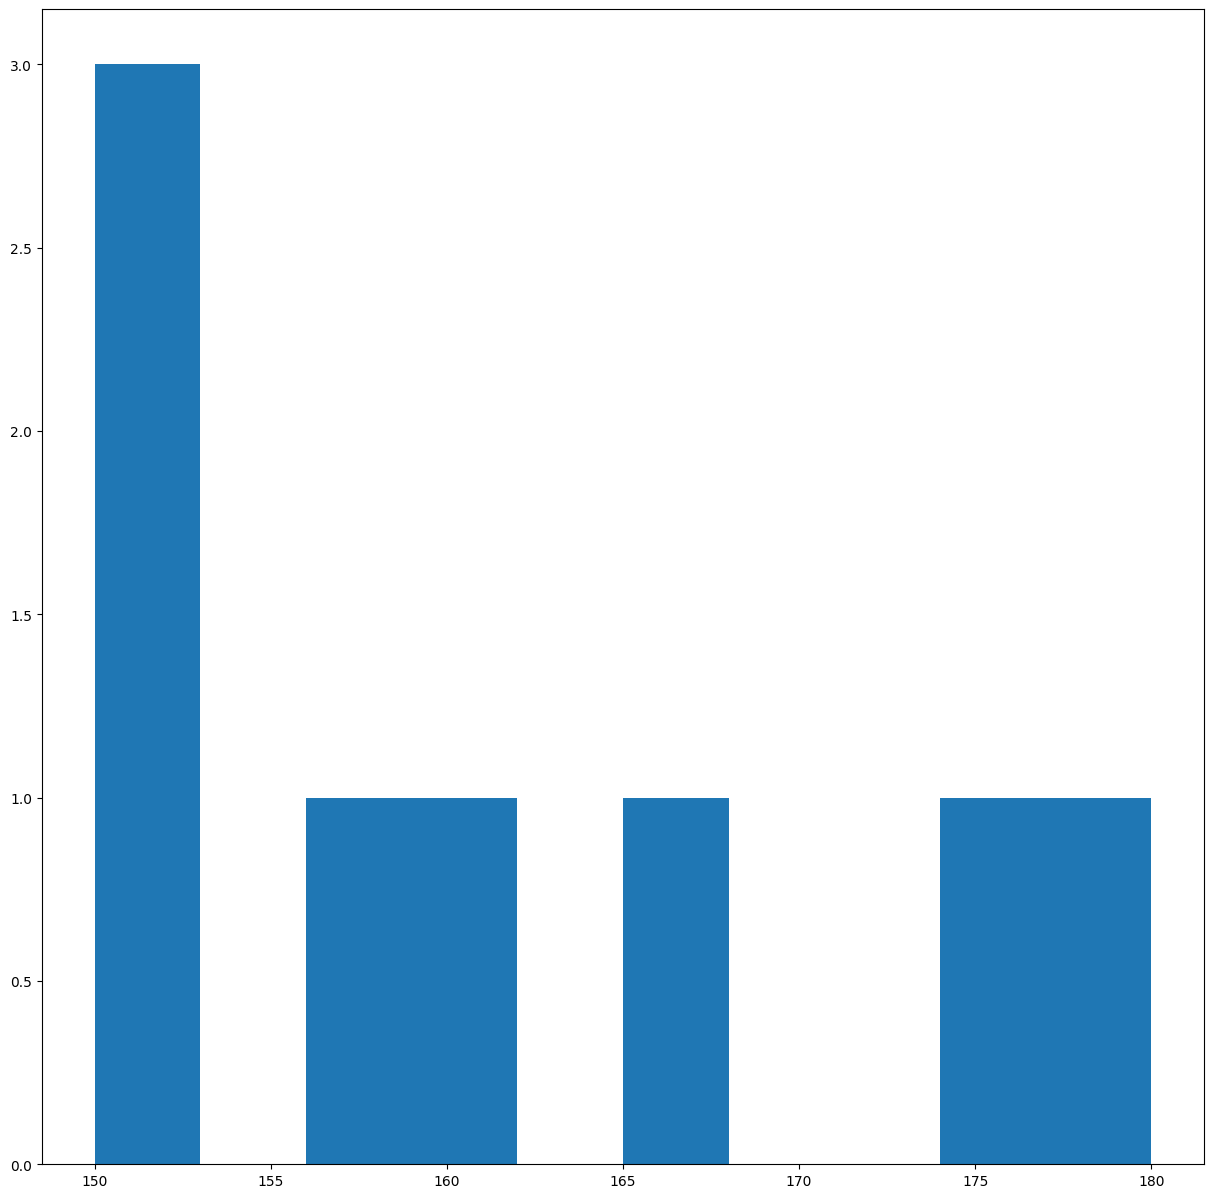

In [153]:
count, bins, ignored = plt.hist(df["Estatura"], 10, density=False)
plt.show()

* Imputación simple por media:

Aqui se logra ver que los datos faltantes fueron reemplazdos por la media = 160.875

In [154]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy="mean")
imp_mean.fit(df)
print(imp_mean.transform(df))


[[150.     45.   ]
 [176.     68.   ]
 [156.     50.   ]
 [160.875  70.   ]
 [180.     80.   ]
 [150.     47.   ]
 [160.     68.   ]
 [165.     64.   ]
 [150.     60.   ]
 [160.875  72.   ]]


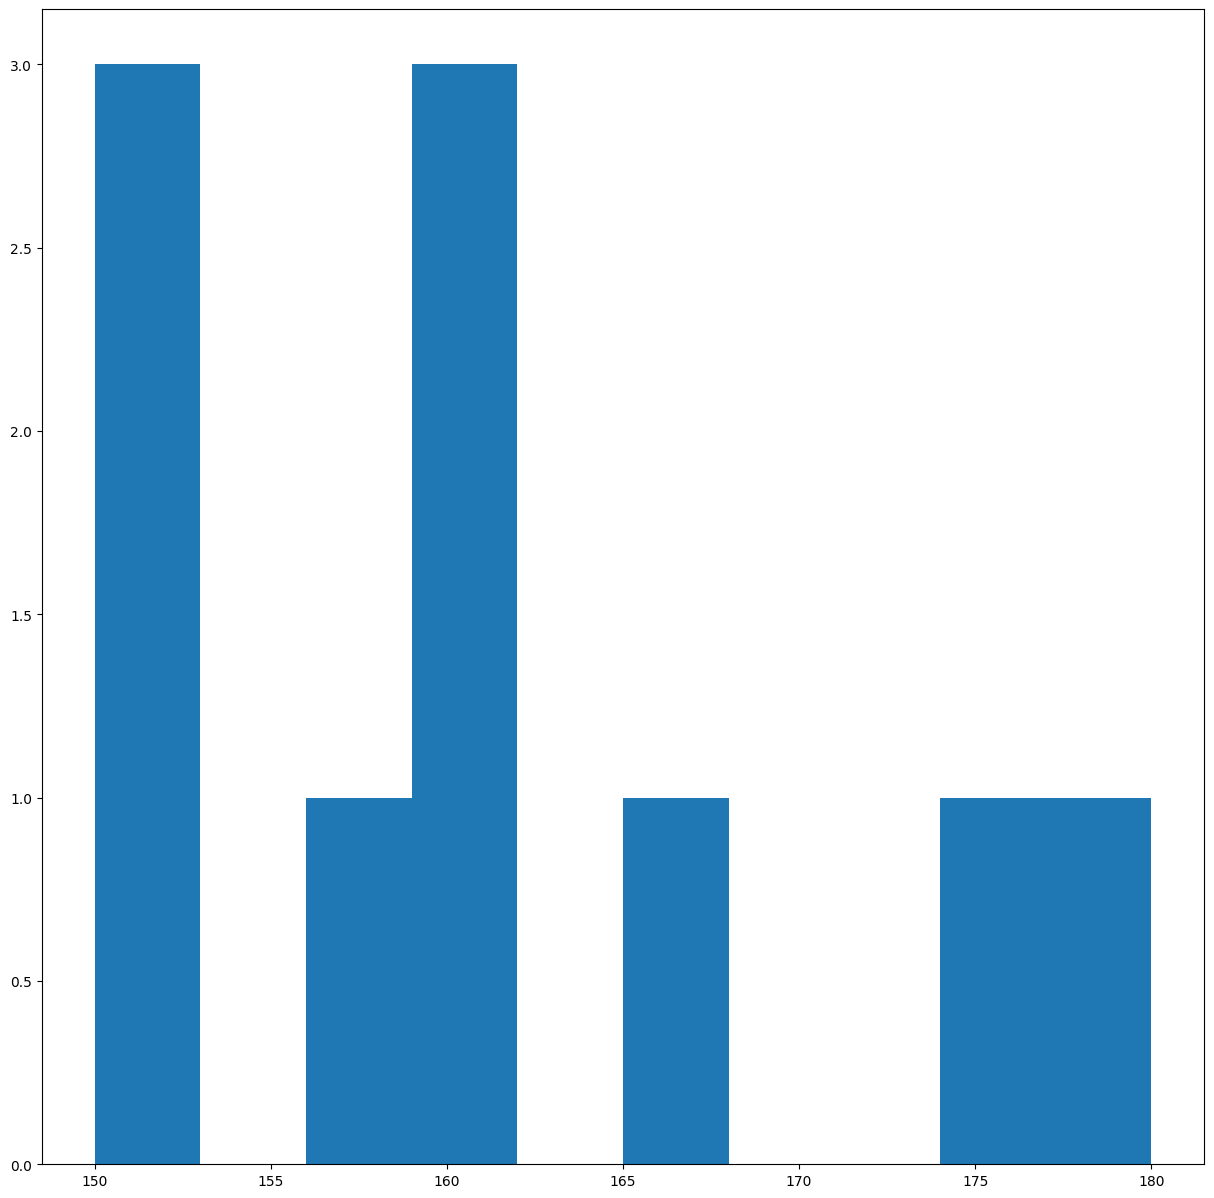

In [155]:
count, bins, ignored = plt.hist(imp_mean.transform(df)[:,0], 10, density=False)
plt.show()

* Imputación simple por la mediana

Aqui se logra ver que los datos faltantes fueron reemplazdos por la mediana = 158

In [156]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy="median")
imp_mean.fit(df)
print(imp_mean.transform(df))


[[150.  45.]
 [176.  68.]
 [156.  50.]
 [158.  70.]
 [180.  80.]
 [150.  47.]
 [160.  68.]
 [165.  64.]
 [150.  60.]
 [158.  72.]]


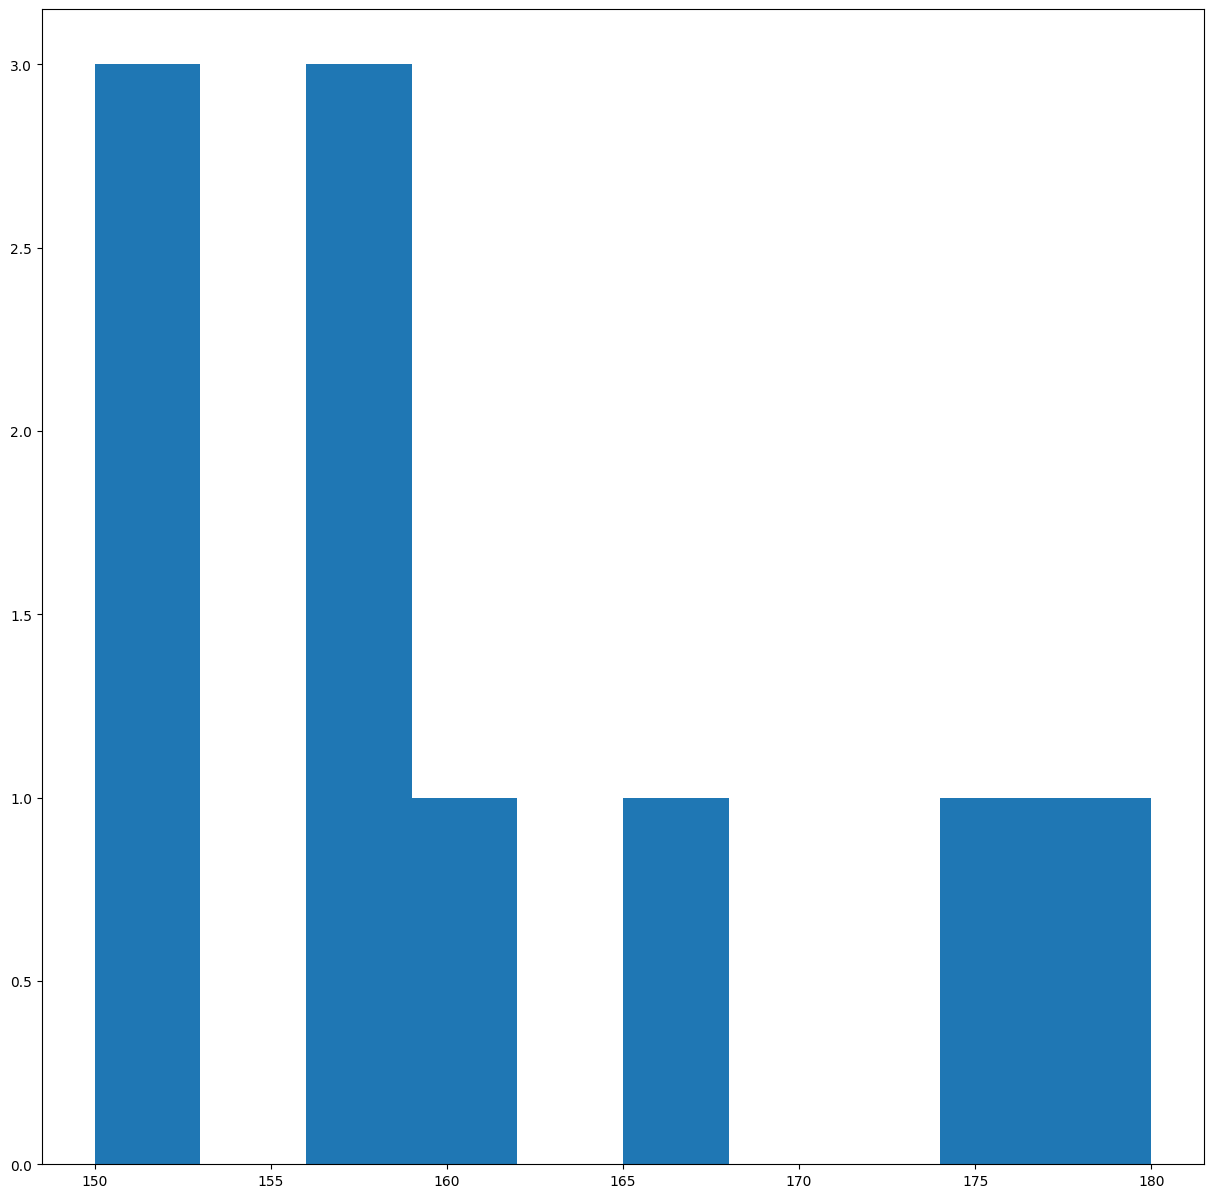

In [157]:
count, bins, ignored = plt.hist(imp_mean.transform(df)[:,0], 10, density=False)
plt.show()

* Imputación simple por la moda

Aqui se logra ver que los datos faltantes fueron reemplazados por la moda = 150.

In [158]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy="most_frequent")
imp_mean.fit(df)
print(imp_mean.transform(df))


[[150.  45.]
 [176.  68.]
 [156.  50.]
 [150.  70.]
 [180.  80.]
 [150.  47.]
 [160.  68.]
 [165.  64.]
 [150.  60.]
 [150.  72.]]


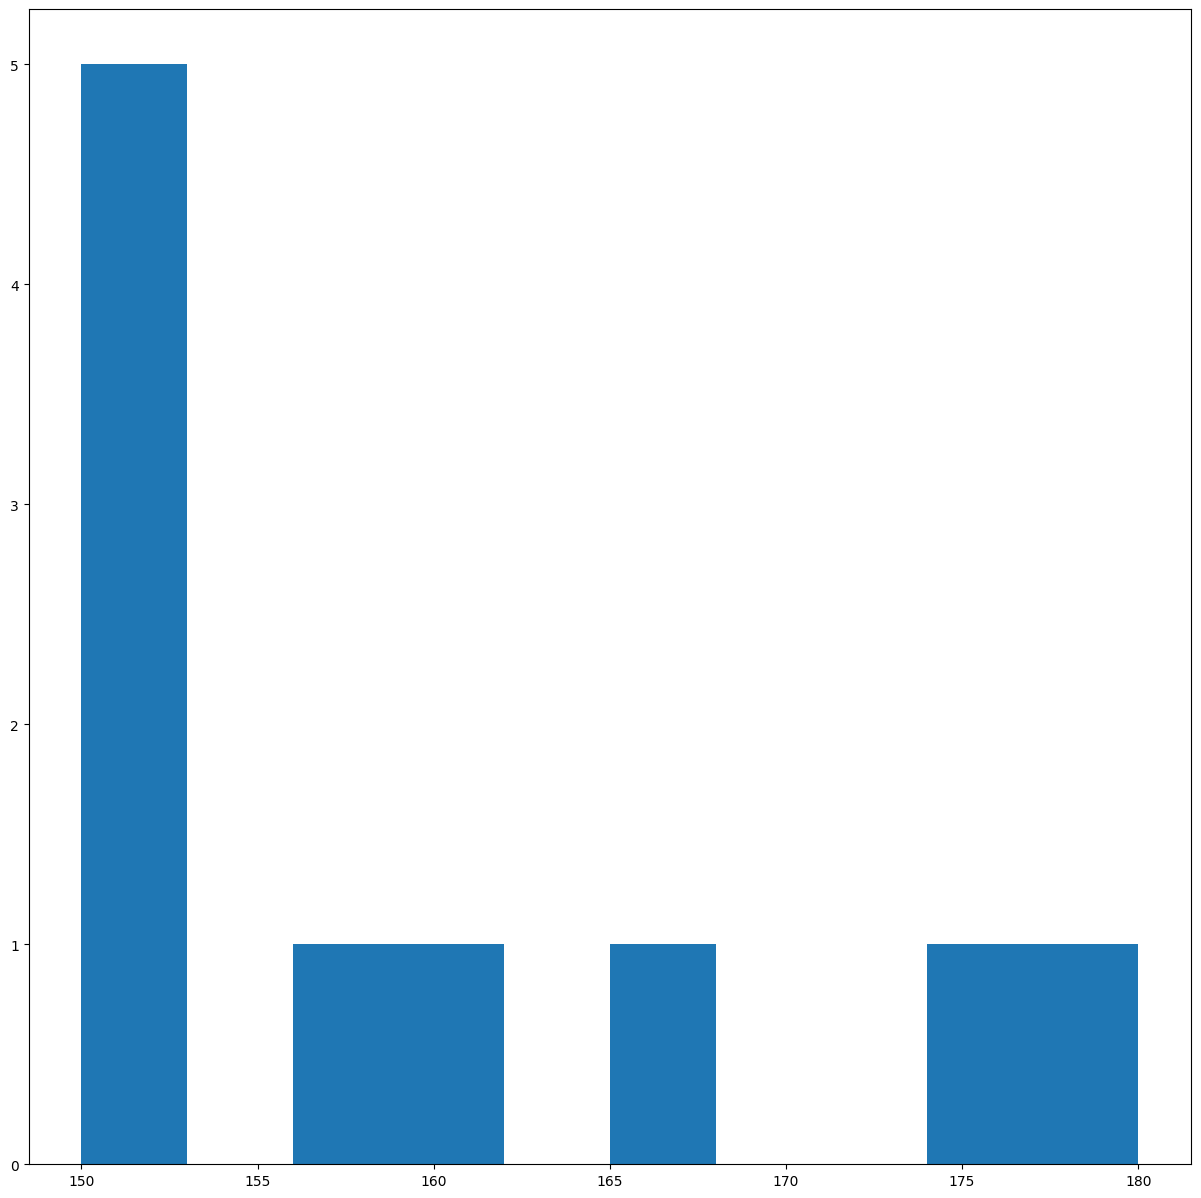

In [159]:
count, bins, ignored = plt.hist(imp_mean.transform(df)[:,0], 10, density=False)
plt.show()

* Imputación Iterativa:

Con esta tecnica se consieran los valores de la variable peso para estimar los valores faltantes de la variables estatura:

In [160]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(df)
print(imp_mean.transform(df))


[[150.          45.        ]
 [176.          68.        ]
 [156.          50.        ]
 [168.58536462  70.        ]
 [180.          80.        ]
 [150.          47.        ]
 [160.          68.        ]
 [165.          64.        ]
 [150.          60.        ]
 [170.16697787  72.        ]]


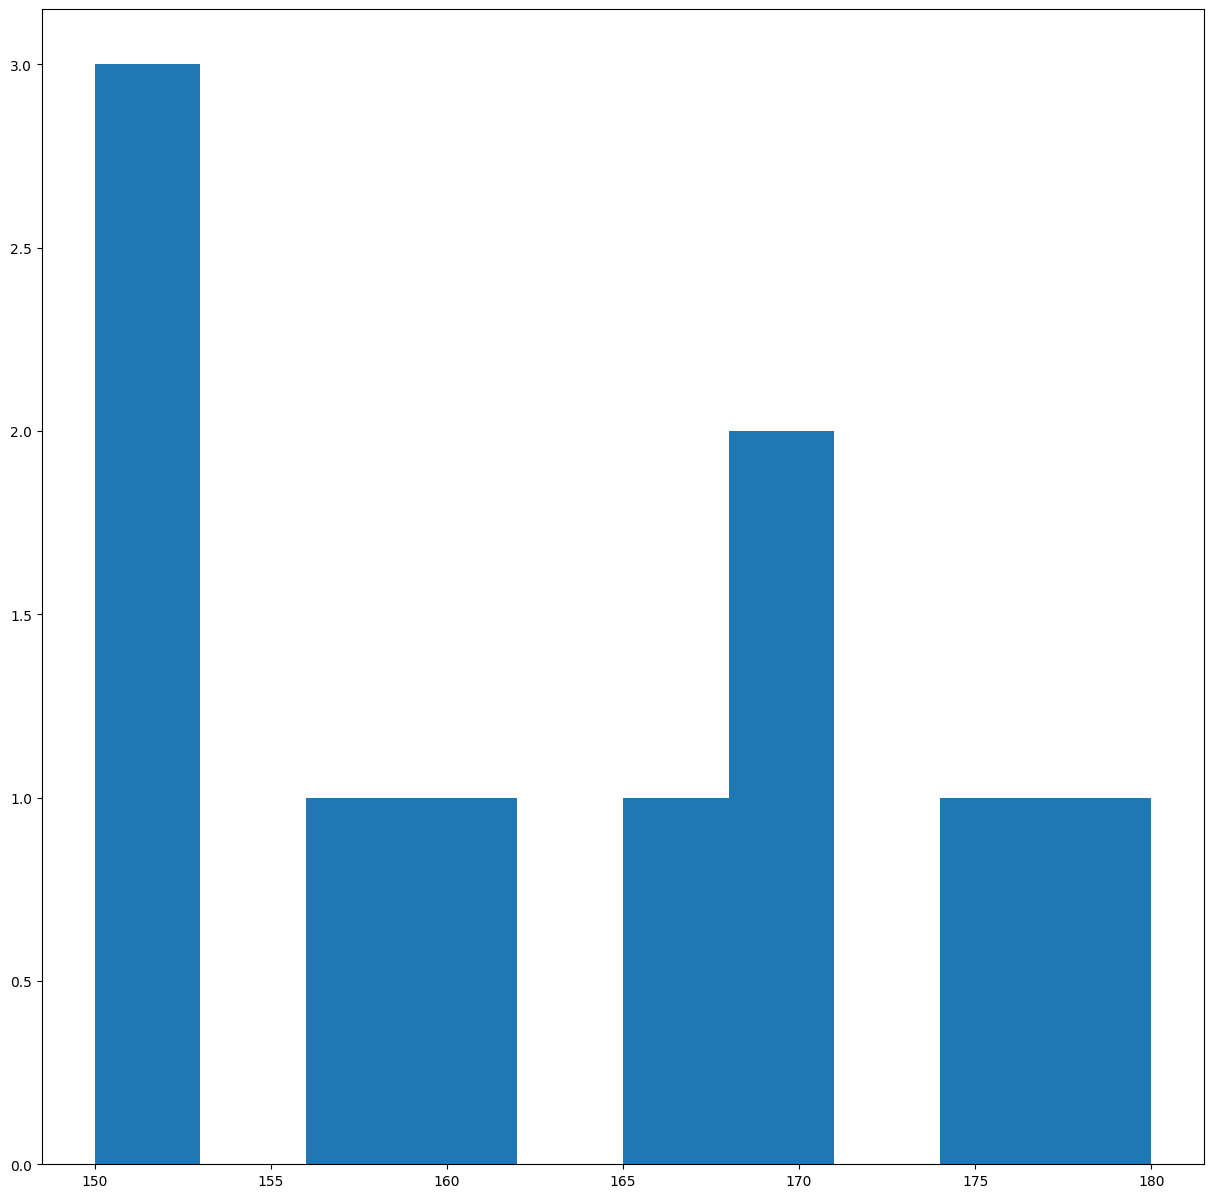

In [161]:
count, bins, ignored = plt.hist(imp_mean.transform(df)[:,0], 10, density=False)
plt.show()

Lo mejor es escoger el metodo que permita preservar lo mayor posible la distribución de los datos, de lo contrario los analisis o inferencias que se realicen no serán acordes a la realidad de los datos, y podrian estar erradas.

## ANÁLISIS Y MODELADO

### 3.  ANÁLISIS EXPLORATORIO

Realice un análisis exploratorio en Python de los datos encontrados en el archivo adjunto en el correo. Este punto es de análisis abierto y no hay un resultado esperado. 

In [220]:
df = pd.read_csv("C:\\Users\\kaes1\\Documents\\Python Scripts\\DatosPruebaAnalisis.csv")
df.head()

,PERIODO,ID CLIENTE,DEPARTAMENTO,CLASIFICACION,CONSUMO,TIPO CONSUMO
0,1/1/2021,1068535,ATLANTICO,RESIDENCIAL,0,REAL
1,1/1/2021,1095302,ATLANTICO,COMERCIAL,21,REAL
2,1/1/2021,1131454,ATLANTICO,RESIDENCIAL,0,REAL
3,1/1/2021,1134487,ATLANTICO,COMERCIAL,132,REAL
4,1/1/2021,1140821,ATLANTICO,RESIDENCIAL,0,REAL


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PERIODO        312 non-null    object
 1   ID CLIENTE     312 non-null    int64 
 2   DEPARTAMENTO   312 non-null    object
 3   CLASIFICACION  312 non-null    object
 4   CONSUMO        312 non-null    int64 
 5   TIPO CONSUMO   312 non-null    object
dtypes: int64(2), object(4)
memory usage: 14.8+ KB


Se tienen 312 registros con 6 columnas, con aparentemente ningún datos faltante.

* Validación de datos faltantes

In [222]:
df.isna().sum()

PERIODO          0
ID CLIENTE       0
DEPARTAMENTO     0
CLASIFICACION    0
CONSUMO          0
TIPO CONSUMO     0
dtype: int64

No existen datos faltantes en el conjunto de datos.

* Validación de datos duplicados

In [223]:
df.duplicated().sum()

0

No existen datos duplicados.

#### Descripción númerica de los datos

In [224]:
df["ID CLIENTE"] = df["ID CLIENTE"].astype("str")
df.describe(include="int")

,CONSUMO
count,312.000000
mean,1226.971154
std,3234.101606
min,-75.000000
25%,11.000000
50%,20.000000
75%,353.750000
max,23748.000000


Para la variable consumo, se tiene una media de 1226.97 y una mediana de 20, lo que indica que el consumo tiene una distribución asimetrica, con un sesgo hacia la derecha. Parecen existir valores atipicos o errados, ya que se ve un consumo negativo como el valor minimo, y esta es una variables cuyos valores deben ser iguales o superiores a 0. El 75% de los regustros de consumo fue menor o igual a 353.75.

In [225]:
df.describe(include="object")

,PERIODO,ID CLIENTE,DEPARTAMENTO,CLASIFICACION,TIPO CONSUMO
count,312,312,312,312,312
unique,12,26,2,3,2
top,1/1/2021,1068535,ATLANTICO,RESIDENCIAL,REAL
freq,26,12,228,180,304


* Se tienen 12 fechas unicas en el campo PERIODO, la mas frecuente es 1/1/2021
* Se tienen datos de 26 clientes
* Se tiene información de 2 departamentos, siendo el mas frecuente Atlantico.
* La clasificacion del inmueble mas frecuente es Residencial 
* Existen dos tipo de consumo, siendo el REAL el mas frecuente.

#### Análisis univariado

##### PERIODO

In [226]:
df["PERIODO"]=pd.to_datetime(df["PERIODO"], forma="%m" )
df.groupby("PERIODO")["PERIODO"].count()

PERIODO
2021-01-01    26
2021-02-01    26
2021-03-01    26
2021-04-01    26
2021-05-01    26
2021-06-01    26
2021-07-01    26
2021-08-01    26
2021-09-01    26
2021-10-01    26
2021-11-01    26
2021-12-01    26
Name: PERIODO, dtype: int64

Se tienen registros del desde enero a diciembre de 2021, con 26 datos de clientes por cada mes.

##### DEPARTAMENTO

In [227]:
data = df.groupby("DEPARTAMENTO")["DEPARTAMENTO"].size().reset_index(name='counts')
fig = px.bar(data, x="DEPARTAMENTO", y="counts", title="Departamento")
fig.show()

Ya se habia visto en el análisis descriptivo que se tenian dos departamentos en esta variable, siendo Atlantico y Magdalena, con una mayor cantidad de registros de clientes para el departamente deL Atlantico, siendo los registros de clientes del Magdalena menos del 30% de los datos. 

##### CLASIFICACION

In [228]:
data = df.groupby("CLASIFICACION")["CLASIFICACION"].size().reset_index(name='counts')
fig = px.bar(data, x="CLASIFICACION", y="counts", title="Clasificación del Inmueble")
fig.show()

La mayoria de los registros de consumo de gas son de clientes con inmuebles de tipo residencial (mas del 50%), seguido de los clientes con inmuebles comerciales, y por ultimo los clientes con inmueble industriales. 

##### TIPO CONSUMO

In [229]:
data = df.groupby("TIPO CONSUMO")["TIPO CONSUMO"].size().reset_index(name='counts')
fig = px.bar(data, x="TIPO CONSUMO", y="counts", title="Tipo de consumo")
fig.show()

Solo 8 registros de consumo de gas corresponden a una medidción estimada, el resto de mediciones de consumo corresponden al consumo real que tuve el cliente o inmueble.

##### CONSUMO

In [230]:
import plotly.express as px
from scipy.stats import kurtosis
import seaborn as sns

col = 'CONSUMO'
print('Column: ', col)
print('Skew:', round(df[col].skew(), 2))
print('Kurtosis: ', round(df[col].kurtosis(), 2))

fig = px.histogram(df, x="CONSUMO",nbins=50,
                   marginal="box", 
                   hover_data=df.columns,
                   title="Distribución del Consumo de gas")
fig.show()

Column:  CONSUMO
Skew: 4.11
Kurtosis:  20.53


Se puede ver que la variable Consumo, tiene una distribución asimetrica, de sesgo positivo ( skew > 0) y con presencia de valores que se podrian considerar atipicos (kurtosis > 3), los cuales se pueden ver tanto en el histograma como una gran cola, y en el boxplot como los puntos que se encuentran por fuera de los bigotes.
Se logra ver que existe un valor menor a cero, que podia considerarse un error de medición o digitación.

Se verifica cuantos datos de consumo menores a 0 se tienen:

In [231]:
np.sum(df["CONSUMO"] < 0)

1

Se identifica a que cliente correponde este dato, para verificar como son los demás registro de consumo que ha tenido el cliente.

In [232]:
df[df["CONSUMO"] < 0]

,PERIODO,ID CLIENTE,DEPARTAMENTO,CLASIFICACION,CONSUMO,TIPO CONSUMO
277,2021-11-01,50071540,ATLANTICO,COMERCIAL,-75,REAL


In [233]:
df[df["ID CLIENTE"] == "50071540"]

,PERIODO,ID CLIENTE,DEPARTAMENTO,CLASIFICACION,CONSUMO,TIPO CONSUMO
17,2021-01-01,50071540,ATLANTICO,COMERCIAL,52,REAL
43,2021-02-01,50071540,ATLANTICO,COMERCIAL,45,REAL
69,2021-03-01,50071540,ATLANTICO,COMERCIAL,48,REAL
95,2021-04-01,50071540,ATLANTICO,COMERCIAL,26,REAL
121,2021-05-01,50071540,ATLANTICO,COMERCIAL,28,REAL
147,2021-06-01,50071540,ATLANTICO,COMERCIAL,40,ESTIMADO
173,2021-07-01,50071540,ATLANTICO,COMERCIAL,30,REAL
199,2021-08-01,50071540,ATLANTICO,COMERCIAL,36,ESTIMADO
225,2021-09-01,50071540,ATLANTICO,COMERCIAL,34,ESTIMADO
251,2021-10-01,50071540,ATLANTICO,COMERCIAL,31,ESTIMADO


Además del registro correpondiente al 11 de enero, los demás valores de consumo que tuvo el cliente con ID 50071540 se podrina considerar normales. El valor de -75 se podria reemplezar por un dato faltantes, y se aplciarian tecnicas de imputación para rellenar el dato.

Ahora se analizan los demás datos que visualmente se identifican como atipicos. 

In [234]:
x = np.quantile(df["CONSUMO"],  [0.25,0.5,0.75])
Q1 = x[0]
Q3 = x[2]
IQR = Q3 - Q1 
LI = Q1 - 1.5*IQR
LS = Q3 + 1.5*IQR
df_atipicos = df.loc[(df["CONSUMO"] < LI) | (df["CONSUMO"] > LS)]
df_atipicos.shape

(58, 6)

Se tienen 58 datos aparentemente atipicos. Estos valores se encuentran por encima de un consumo de 1000.

In [235]:
df_atipicos["CONSUMO"].unique()

array([ 6165,  4595, 21859,  6555,  5753,  6672,  4308, 19855,  7267,
        8828,  4270, 23748,  3814,  8519,  5043,  4123, 19995,  3838,
        7607,  1533,  4403, 16442,  3579,  6976,  1596,  4537,  4207,
        3938,  3822,  1806,  4470,  6603,  7240,  3370,  1990,  4619,
        4691,  8091,  2700,  3086,  4845,  1795,  8298,  2802,  4599,
        3028,  9210,  1964,  2526,  4575,  8390,  5874,  3573,  2728,
        5594, 12953,  6078,  6103], dtype=int64)

In [236]:
print(np.min(df_atipicos["CONSUMO"].unique()))
print(np.max(df_atipicos["CONSUMO"].unique()))

1533
23748


Para verificar que estos datos se pueden considerar como atipicos, se revisa a que clasificacion pertenecen:

In [237]:
df_atipicos["CLASIFICACION"].value_counts()

CLASIFICACION
INDUSTRIAL    58
Name: count, dtype: int64

Los valores que aparentemente eran atipicos, son consumos de inmuebles industriales, los cuales es común que tengan altos consumos de gas. Estos datos que parecen ser un consumo atipico de gas, hacen parte del comportamiento normal de consumo para clientes con inmuebles de tipo industriual, por lo que no serian atipicos en su totalidad.

Tambien se logra observar que existen muchos regsitros en los que se tuvo un consumo de 0.

In [238]:
df[df["CONSUMO"]==0]["ID CLIENTE"].value_counts()

ID CLIENTE
1068535     12
1131454     12
1140821     12
50071540     1
Name: count, dtype: int64

Para 3 clientes, no se registraron consumo de gas durante todo el 2021. Esto podria indicar que estos inmuebles ya no estan siendo utilizados y por tanto no registran consumo de gas.

#### Análisis Bivariado

##### CONSUMO VS CLASIFICACIÓN

In [239]:
fig = px.box(df, x="CONSUMO", y="CLASIFICACION",orientation="h", title="Consumo por tipo de inmueble")
fig.show()

Con esto se confirma, que los inmuebles de tipo Industrial son los que tienen mayor consumo de gas, seguido de los inmuebles de tipo Comercial. Los inmuebles de tipo residencial, auqnue son mayoria, son los que menos gas consumen, teniendo valores meneroa a 50.

Dentro de los valores de consumo de gas para inmuebles industriales, se puede apreciar que existen algunos valores atipicos visualmente.

##### CONSUMO VS DEPARTAMENTO


In [240]:
fig = px.box(df, x="CONSUMO", y="DEPARTAMENTO",orientation="h", title="Consumo por Departamento", points="all")
fig.show()

Se logra apreciar que se tiene una menor dispersión del valor de consumo para el departmaento del Atlantico, en comparación a la dispersión que se tiene para el consumo del departamento de Magdalena, que a pesar de tener menor cantidad de registros, se tiene una tendencia hacia valores mayores de consumo, seguramente por la presencia de los inmbuenles industriales en este departamento.

##### CONSUMO VS PERIODO

In [241]:
data = df.groupby(["PERIODO"]).sum().reset_index()
fig = px.line(data, x="PERIODO", y="CONSUMO")
fig.show()


Se logra apreciar que para los primeros meses del 2021 se tuvo el mayor consumo de gas, con un pico en marzo. De ahi en adelante se tuvo una tendencia a la baja en el consumo de gas, para luego retomar una tendencia a la alza a partir de octubre.

Como los inmuebles comerciales tienen una gran influencia en la suma de consumo por dia, se desea visualizar tambien el consumo para cada periodo, discriminado por tipo de inmueble:

In [242]:
data = df.groupby(["PERIODO", "CLASIFICACION"]).sum().reset_index()
fig = px.line(data, x="PERIODO", y="CONSUMO", facet_col="CLASIFICACION", facet_col_wrap=1, color="CLASIFICACION", title="Consumo por tipo de Inmueble - 2021")
fig.update_yaxes(matches=None)
fig.show()

* Para el consumo de los inmuebles comerciales, se tiene valores altos de consumos los primeros meses del 2021, luego se tiene una baja en el consumo, para posteriormente mantener un consumo aparentemente constante a partir de junio.
* En los inmuebles industriales, se tiene tambien los valores mas alto los primeros meses, con un pico de consumo en marzo, a partir del cual se tiene una tendencia a la baja en el consumo, para retornar a una alza en el consumo o a partir de octubre.
* Finalmente, para los inmuebles residenciales, no se tiene una tendencia a la alza o la baja, mas bien parece que los datos son estacionarios, con un patrón estacional que se repite cada 6 meses. 




In [243]:
data = df.groupby(["PERIODO", "DEPARTAMENTO"]).sum().reset_index()
fig = px.line(data, x="PERIODO", y="CONSUMO", color="DEPARTAMENTO", title="Consumo por Departamento - 2021")
fig.show()

Para los primeros meses del 2021, se tuvo un mayor consumo de gas en el departamento del Magdalena en comparación al departamento del Atlantico, a pesar que la mayoria de clientes son del Atlantico. A partir de junio, el consumo de gas en el Atlantico fue mayor, manteniendose hasta novimebre. Para diciembre, el consumo del Magdalena vuele a superar al consumo de gas en el Atlantico.

##### CLASIFICACION VS DEPARTAMENTO 

In [244]:
fig = px.density_heatmap(df, x="CLASIFICACION", y="DEPARTAMENTO", text_auto=True)
fig.show()

Para el caso del departamneto de Magdalena, no se tienen clientes con inmuebles de tipo comercial, solo de tipo residencial e industrial. Para ambos departamentos, la mayoria de clientes son inmuebles residenciales.

#### ANÁLISIS DE CORRELACIÓN

Ahora se analiza si existen una correlación entre las variables que se estan estudiando.

Para esto se plantean las siguiente hipotesis:

$H_{0}:$ No existe una relación entre las variables

$H_{1}:$ Si existe una realción entre la variables

(Las hipotesis asociadas a cada puebra que se va a utilizar son diferentes a la planteadas, pero se adaptan para facilitar la compresión de los resultados )

* CONSUMO VS DEPARTAMENTO

In [245]:
from scipy.stats import f_oneway

result = f_oneway(*[group['CONSUMO'] for name, group in df.groupby('DEPARTAMENTO')])

print("Estadísticas de ANOVA:")
print(f"F-value: {result.statistic}")
print(f"p-value: {result.pvalue}")

Estadísticas de ANOVA:
F-value: 16.064344369906067
p-value: 7.674551801537477e-05


Al realizar el análisis de varianza para estas dos variable, y considerando un nivel de significancia del 0.05, como el p.valor es menor al nivel de significancia, se puede afrimar que existen diferencias significativas estadisticamente entre el consumo por Departamento, por lo que si existe una relación entre el Departamento y el Consumo.

* CONSUMO VS CLASIFICACION

In [246]:
result = f_oneway(*[group['CONSUMO'] for name, group in df.groupby('CLASIFICACION')])

print("Estadísticas de ANOVA:")
print(f"F-value: {result.statistic}")
print(f"p-value: {result.pvalue}")

Estadísticas de ANOVA:
F-value: 188.14256213078923
p-value: 3.601376459934906e-54


Al realizar el análisis de varianza para estas dos variable, y considerando un nivel de significancia del 0.05, como el p.valor es menor al nivel de significancia, se puede afrimar que existen diferencias significativas estadisticamente entre el consumo por tipo de inmueble, por lo que si existe una relación entre el Departamento y el tipo de inmueble. Esto ya se lograba apreciar en los graficos realizados anteriormente, y solo se reliza la prueba como un metodo confirmatorio.

In [247]:
from scipy.stats import chi2_contingency
tabla_contingencia = pd.crosstab(df["DEPARTAMENTO"], df["CLASIFICACION"])
correlacion = chi2_contingency(tabla_contingencia)
print(f"p-value: {correlacion.pvalue}")

p-value: 1.9548330709779576e-08


En este caso, considerando el mismo nivel de significancia, se considera que si existe una relación entre Departamento y el tipo de inmueble.

#### PREPARACIÓN DE LOS DATOS

Se va a imputar el valor de Consumo para la persona que tiene un registro negativo. Para las personas que han tenido un consumo de 0 durante todo el año, no se quitaran ni eliminarán, ya que no no afectan el valor total del consumo mensual, y se tendria que indigar mas en la causa de ese consumo igual a 0 antes de decidir realizar una imputación de datos. 

In [248]:
df.loc[277,"CONSUMO"] = None

In [267]:
df.loc[277,"CONSUMO"]

nan

Para este caso se utilizará la mediana del consumo para la imputación del dato atipico.

In [286]:
imp_consumo =  SimpleImputer(strategy='median')
df["CONSUMO"] = imp_consumo.fit_transform(df["CONSUMO"].values.reshape(-1,1))

In [287]:
df.loc[277,"CONSUMO"]

20.0

Ahora se obtiene el total de consumo mensual:

In [289]:
df_new = df.groupby(["PERIODO"]).sum().reset_index().loc[:,["PERIODO", "CONSUMO"]]
df_new.head()

,PERIODO,CONSUMO
0,2021-01-01,46316.0
1,2021-02-01,39529.0
2,2021-03-01,50635.0
3,2021-04-01,41801.0
4,2021-05-01,33938.0


In [290]:
df_new['YEAR'] = df_new['PERIODO'].dt.year
df_new['MES'] = df_new['PERIODO'].dt.month

In [337]:
df_new.head()

,PERIODO,CONSUMO,YEAR,MES
0,2021-01-01,46316.0,2021,1
1,2021-02-01,39529.0,2021,2
2,2021-03-01,50635.0,2021,3
3,2021-04-01,41801.0,2021,4
4,2021-05-01,33938.0,2021,5


In [307]:
df_encoded = pd.get_dummies(df_new, columns=['MES', 'YEAR'], drop_first=True)
df_encoded

,PERIODO,CONSUMO,MES_2,MES_3,MES_4,MES_5,MES_6,MES_7,MES_8,MES_9,MES_10,MES_11,MES_12
0,2021-01-01,46316.0,False,False,False,False,False,False,False,False,False,False,False
1,2021-02-01,39529.0,True,False,False,False,False,False,False,False,False,False,False
2,2021-03-01,50635.0,False,True,False,False,False,False,False,False,False,False,False
3,2021-04-01,41801.0,False,False,True,False,False,False,False,False,False,False,False
4,2021-05-01,33938.0,False,False,False,True,False,False,False,False,False,False,False
5,2021-06-01,19342.0,False,False,False,False,True,False,False,False,False,False,False
6,2021-07-01,24738.0,False,False,False,False,False,True,False,False,False,False,False
7,2021-08-01,23387.0,False,False,False,False,False,False,True,False,False,False,False
8,2021-09-01,19451.0,False,False,False,False,False,False,False,True,False,False,False
9,2021-10-01,22865.0,False,False,False,False,False,False,False,False,True,False,False


### 4. PLANTEAMIENTO DE MODELO

*Plantee modelo que permita predecir los consumos del primer mes del año 2022, tomando como base el año de historia que se tiene en el archivo adjunto. Identifique cuales y cuantos modelos implementaría y explique su razonamiento.*

Considerando que la información historica con la que se cuenta es reducida, no seria necesario implementar modelos complejos, como las redes neuronales, ya que no se tendria suficiente información para el entrenamiento y es un problema que se podria resolver con metodos mas simples y clasicos.

Para realizar la predicción de consumo del mes de enero de 2022, se podrian considerar dos opciones, aplicar modelos de regresión simple, considerando como variable dependiente el Consumo, y como variable independiente el tiempo, en este caso el mes. Se podria aplicar un modelo de regresión de Ridge o uno de Lasso. En este escenario los resultados de predicción que obtengan para otros años, será igual mes a mes, es decir, la predicción de enero de 2022 será igual a la predicción de enero de 2023, pues solo se esta considerando el efecto del mes sobre la variable Consumo.

Tambien se podrian implementar modelos de series de tiempo, que traten de explicar la variabilidad del consumo de gas mes a mes, y hacer la estimación para el proximo año. Se podrian aplicar tecnicas de series de tiempo como ARIMA, Suavizamiento exponencial simple, ya que no se detecta una estacionalidad en los datos del consumo a nivel global. Si se considerara hacer la predicción de consumo para cada tipo de inmueble (Comercial, Industrial y residencial), se podrian aplicar tecnicas de series de tiempo que incluyan el factor estacional, como SARIMA o Suavizamiento Exponencial doble o triple, principalmente para el consumo residencial, ya que se ve un patrón estacional para este tipo de clientes. 

### 5. MODELADO

*En la medida de lo posible, implemente los modelos planteados en el punto 4, para esto debe usar Python.*

* Regresión Ridge

Se hace la separación de los datos, apartando los resgistrso del mes de novimebre y dicembre para evaluar el modelo.

In [360]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

X= df_encoded.drop(["CONSUMO", "PERIODO"],axis=1)
y = df_encoded["CONSUMO"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2,shuffle = False, stratify= None)

Se crea un pipeline para realizar hiperparametrización de alpha, y encontrar el valor que arroja el mejor modelo.

In [361]:
pipe = make_pipeline(StandardScaler(), Ridge())
param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 2.5, 5, 7.5, 10, 100]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=100))])


Se obtiene que alpha = 100, es el parametro que permite obtener el mejor modelo.

In [362]:
ridge_metrics = {'RMSE': 1000,
               'R2': 0}

reg = Ridge(alpha=100)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
score = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = reg.score(X_test, y_test)
ridge_metrics['RMSE'] = score
ridge_metrics['R2'] = r2

# Resultados
print(ridge_metrics)

{'RMSE': 4620.459508430287, 'MAPE': 0, 'R2': -0.16978985127021762}


In [363]:
y_pred

array([32214.3016983, 32214.3016983])

Los resultados obtenidos con este modelo no fueron muy buenos, debidos a la poca cantidad de datos. Observando el valor del R2, que es negativo, se puede ver que este modelo no explica nada de la variabilidad del consumo, y el modelo obtenido no es mejor que implementar una linea constante para hacer las estimaciones. Este modelo no es adecuado para realizar la predicción del mes de enero del 2022.

* ARIMA

In [364]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

Se realiza un análisis de autocorrelación de la serie de tiempo del Consumo, obsevando el grafico ACF para la serie de tiempo orginal, se puede ver por el comportamiento de los rezagos, que la serie no es estacionaria, y efectivamente existe una tendencia. Al realizar 2 diferenciaciones de la serie de tiempo, se obtiene una serie de tiempo estacionaria.

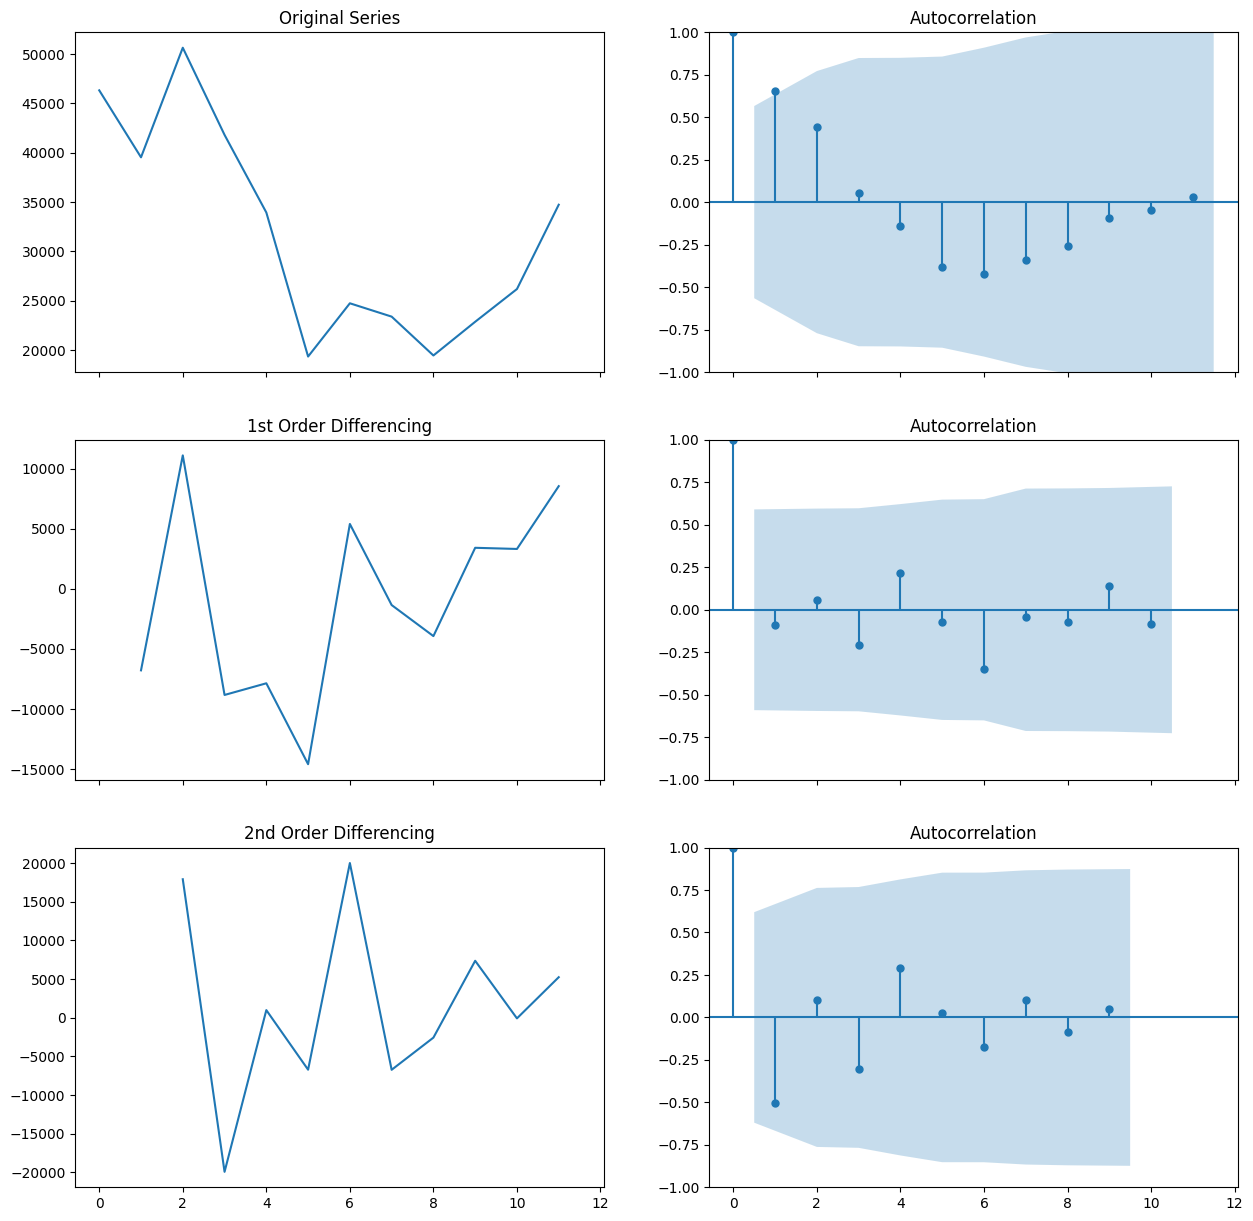

In [399]:
plt.rcParams.update({'figure.figsize': (15,15)})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df_new.CONSUMO); axes[0, 0].set_title('Original Series')
plot_acf(df_new.CONSUMO, ax=axes[0, 1], lags =11);

axes[1, 0].plot(df_new.CONSUMO.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_new.CONSUMO.diff().dropna(), ax=axes[1, 1], lags =10);

axes[2, 0].plot(df_new.CONSUMO.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_new.CONSUMO.diff().diff().dropna(), ax=axes[2, 1], lags = 9);

Se hace una división de los datos, para entrenar la serie de tiempo y luego para evaluarla, dejando los regsitros de noviembre y diciembre para el test.

In [373]:
n = len(df_new.CONSUMO)
n_test = 2 
train_size = n - n_test

train = df_new.CONSUMO.iloc[:train_size]
dates_train = df_new.PERIODO.iloc[:train_size]
test_1w = df_new.CONSUMO.iloc[train_size:train_size + n_test] 
dates_1w = df_new.CONSUMO.iloc[train_size:train_size + n_test] 
print("train:", train.shape)
print("test_1w:", test_1w.shape)

train: (10,)
test_1w: (2,)


In [374]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

Con el siguiente codigo se busca obtener los parametros del modelo ARIMA, que permitan obtener la metrica AIC mas baja.

In [375]:
best_aic = np.inf
best_bic = np.inf

best_order = None
best_mdl = None

pq_rng = range(5)
d_rng  = range(3)

for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                tmp_mdl = ARIMA(train, order=(i,d,j)).fit()
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue

In [376]:
print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

aic: 172.19429 | order: (1, 2, 0)


En este caso se tiene un proceso autorregresivo de orde 1, media movil de orden 0, y se realizan 2 diferenciaciones en la serie de tiempo.

In [377]:
from statsmodels.graphics.tsaplots import plot_predict

model = ARIMA(train, order=best_order)
model_fit = model.fit()

El modelo ajustado a la serie de tiempo:

<Figure size 1200x800 with 0 Axes>

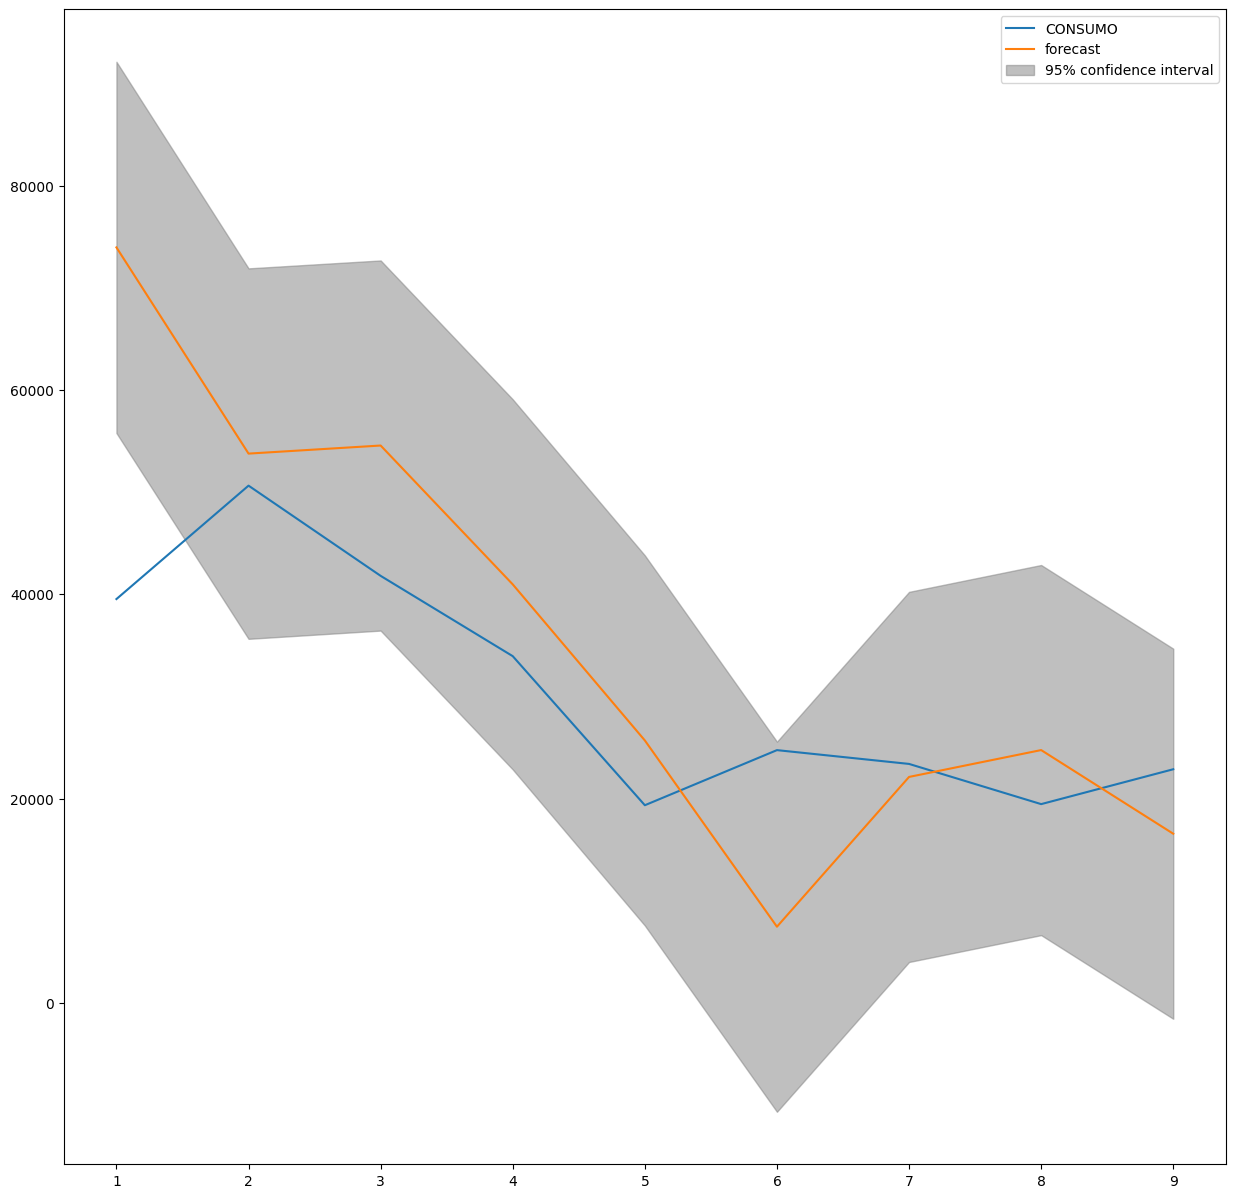

In [378]:
plt.figure(figsize = (12,8))
fig, ax = plt.subplots()
ax = y_train.loc[1:].plot(ax=ax)
plot_predict(model_fit, 1, ax=ax)
plt.show();

Función para obtener las metricas de predicción:

In [379]:
from sklearn.metrics import r2_score

def forecast_accuracy(forecast, actual, str_name):
    
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual)) # MAPE
    mae = np.mean(np.abs(forecast - actual))                 # MAE
    rmse = np.mean((forecast - actual)**2)**.5               # RMSE
    mse = np.mean((forecast - actual)**2)                    # MSE
    r2 = r2_score(forecast, actual)
    
    df_acc = pd.DataFrame({'MAE': [mae],
                           'MSE': [mse],
                           'MAPE': [mape],
                           'RMSE': [rmse],
                           'R2': [r2]},
                          index=[str_name])
    
    return df_acc

Función para ealizar una predicción movil, ya que el modelo arima solo permite hacer la predicción para un horizonte de 1:

In [382]:
def arima_rolling(history, test):
    
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=best_order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
        
    return predictions

In [383]:
test_1wl = test_1w.tolist()
yhat_1w  = arima_rolling(train.tolist(), test_1wl)

predicted=23330.214270, expected=26182.000000
predicted=29537.457998, expected=34726.000000


In [384]:
forecast_accuracy(np.array(test_1wl), np.array(yhat_1w), "week 1")

,MAE,MSE,MAPE,RMSE,R2
week 1,4020.163866,1.752682e+07,0.148948,4186.505103,0.039625


Este modelo tambien tiene un R2 bajo, por lo que no logra explicar muy bien la variabilidad del consumo de gas. Aunque los valores obtenidos durnate el testeo son mas cercanos al valor real de los obtenidos con el modelo de Ridge.

#### PREDICCIÓN

Se utiliza el modelo de ARIMA, para realizar la predicción del mes de enero de 2022:

In [394]:
model2 = ARIMA(df_new["CONSUMO"], order=best_order)
model2_fit = model2.fit()

In [395]:
pred = model2_fit.forecast()
pred

12    41195.289281
dtype: float64